# EDA

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'E:/alex/disco duro viejo/Desarrollo profesional/Python/DS4B/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/01_LEADSCORING'

Nombres de los ficheros de datos.

In [3]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [4]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

In [5]:
cat.ambito.value_counts()

Select                               1323
Finance Management                    665
Human Resource Management             563
Marketing Management                  545
Operations Management                 340
OTROS                                 337
Business Administration               270
IT Projects Management                256
Supply Chain Management               241
Banking, Investment And Insurance     231
Media and Advertising                 140
Travel and Tourism                    139
International Business                131
Healthcare Management                 106
Name: ambito, dtype: int64

In [6]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [7]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
25,ambito,Healthcare Management,0.020049
28,ambito,International Business,0.024778
35,ambito,Travel and Tourism,0.026291
30,ambito,Media and Advertising,0.026480
22,ambito,"Banking, Investment And Insurance",0.043692
34,ambito,Supply Chain Management,0.045584
27,ambito,IT Projects Management,0.048421
23,ambito,Business Administration,0.051069
31,ambito,OTROS,0.063741
32,ambito,Operations Management,0.064309


Borramos los registros cuyo valor de algunas de las variables tienen una penetración muy muy baja y ciertas variables que son practicamente constantes y que no habíamos detectado en la calidad de datos

In [8]:
cat = cat.loc[(cat.no_enviar_email != 'Yes') & (cat.no_llamar != 'OTROS') & (cat.ult_actividad != 'Email Bounced')] \
        .drop(columns = ['conociste_google',
                         'conociste_facebook',
                         'conociste_referencias',
                         'no_enviar_email',
                         'no_llamar'])

In [9]:
#Borramos los registros del df de 'num' que hemos borrado en el df de 'cat'
num = num.loc[num.index.isin(cat.index)]

### Análisis gráfico

In [18]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
        plt.tight_layout();

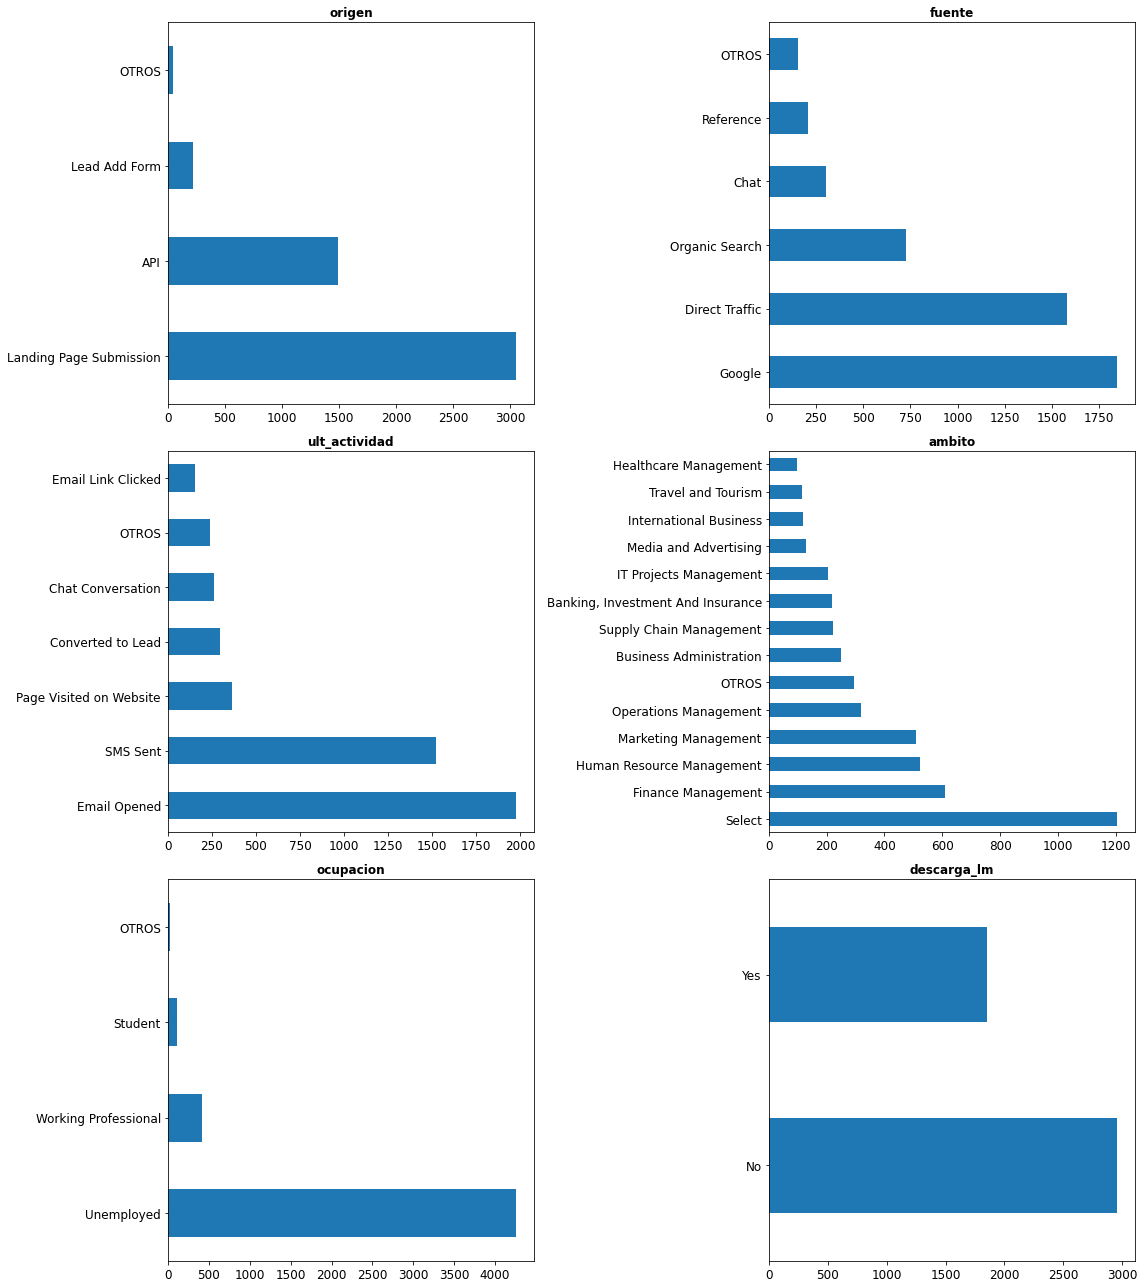

In [19]:
graficos_eda_categoricos(cat)

## EDA NUMÉRICAS

### Análisis estadístico

In [12]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [13]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
compra,4809.0,0.416927,0.0,0.493102,0.0,0.0,0.0,1.0,1.0
visitas_total,4809.0,4.136827,3.0,3.446585,0.0,2.0,3.0,5.0,54.0
tiempo_en_site_total,4809.0,603.884591,364.0,555.580537,0.0,130.0,364.0,1094.0,2272.0
paginas_vistas_visita,4809.0,2.864577,2.5,1.896899,0.0,2.0,2.5,4.0,24.0
score_actividad,4809.0,14.053026,14.0,0.958311,8.0,14.0,14.0,14.0,18.0
score_perfil,4809.0,16.290705,16.0,1.416388,11.0,16.0,16.0,17.0,20.0


### Análisis gráfico

In [14]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

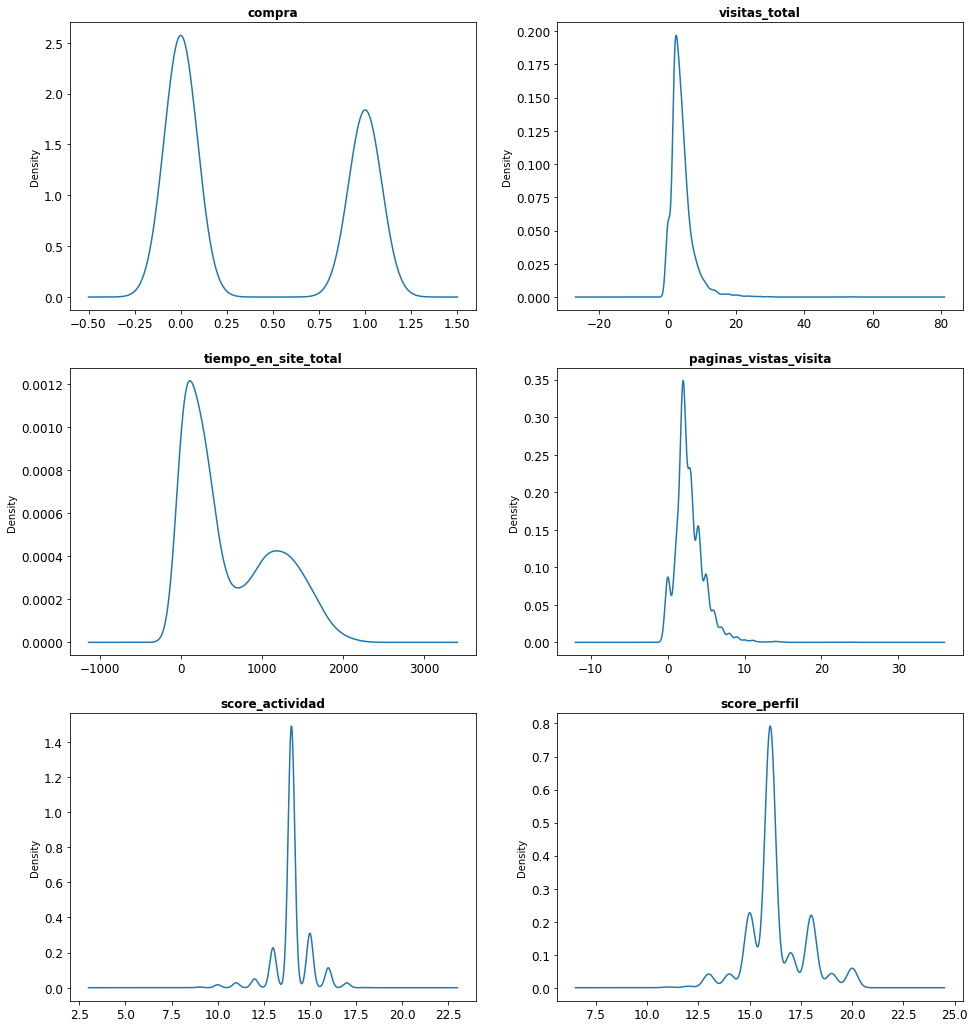

In [15]:
graficos_eda_continuas(num)

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

In [16]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [17]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)